# Summer 2023 Applied NLP Homework 2

## Instructors: Dr. Mahdi Roozbahani

## Deadline: June 16th, 11:59PM AoE

## Honor Code and Assignment Deadline
<!-- No changes needed on the below section -->
* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Ed as part of the Q/A. However, all assignments should be done individually.
<font color='darkred'>
* Plagiarism is a **serious offense**. You are responsible for completing your own work. You are not allowed to copy and paste, or paraphrase, or submit materials created or published by others, as if you created the materials. All materials submitted must be your own.</font>
<font color='darkred'>
* All incidents of suspected dishonesty, plagiarism, or violations of the Georgia Tech Honor Code will be subject to the institute’s Academic Integrity procedures. If we observe any (even small) similarities/plagiarisms detected by Gradescope or our TAs, **WE WILL DIRECTLY REPORT ALL CASES TO OSI**, which may, unfortunately, lead to a very harsh outcome. **Consequences can be severe, e.g., academic probation or dismissal, grade penalties, a 0 grade for assignments concerned, and prohibition from withdrawing from the class.**
</font>


## Instructions for the assignment 

<!-- No changes needed on the below section -->
- This entire assignment will be autograded through Gradescope.

- We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You will submit your implemented .py files to the corresponding homework section on Gradescope. 

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.


## Using the local tests <a id='using_local_tests'></a>
- For some of the programming questions we have included a local test using a small toy dataset to aid in debugging. The local test sample data and outputs are stored in .py files in the **local_tests** folder
- There are no points associated with passing or failing the local tests, you must still pass the autograder to get points. 
- **It is possible to fail the local test and pass the autograder** since the autograder has a certain allowed error tolerance while the local test allowed error may be smaller. Likewise, passing the local tests does not guarantee passing the autograder. 
- **You do not need to pass both local and autograder tests to get points, passing the Gradescope autograder is sufficient for credit.**
- It might be helpful to comment out the tests for functions that have not been completed yet. 
- It is recommended to test the functions as it gets completed instead of completing the whole class and then testing. This may help in isolating errors. Do not solely rely on the local tests, continue to test on the autograder regularly as well. 

# Google Colab Setup (Optional for running on Colab)
You may need to right click on the Applied NLP folder and `Add shortcut to Drive`

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

## Change path to directory of where notebook is located
%cd '/content/drive/MyDrive/Applied_NLP/HW2/hw2_code/'

## If no GPU selected it will ask for GPU to be selected
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)


## This wraps output text according to the window size
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

ModuleNotFoundError: No module named 'google.colab'

# Assignment Overview

In this homework we will explore more classification algorithms: Logistic Regression, Perceptron, and Support Vector Machine (SVM).

We will reuse the datasets from HW1 for this exploration:
* The first dataset is a subset of a [Clickbait Dataset](https://github.com/bhargaviparanjape/clickbait/tree/master/dataset) that has article headlines and a binary label on whether the headline is considered clickbait. 
* The second dataset is a subset of [Web of Science Dataset](https://data.mendeley.com/datasets/9rw3vkcfy4/6) that has articles and a corresponding label on the domain of the articles. 

After exploring the classification algorithms, we will take a look at dimensionality reduction techniques and word embedding methods such as the co-occurrence embeddings and Global Vectors for Word Representations (GloVe). We will then feed these embeddings to the classification algorithms and compare the results against the Tf-Idf encodings.

## Deliverables and Points Distribution

### Q1: Logistic Regression [16pts]
- **1.1 Implementing Logistic Regression from Scratch** [16pts] Deliverables: <font color = 'green'>regression.py</font>

    - [1pts] \__init__

    - [3pts] onehot

    - [5pts] gradient

    - [5pts] gradient_descent
    
    - [2pts] predict

### Q2: Perceptron [11pts]
- **2.1 Implementing Perceptron from Scratch** [11pts] Deliverables: <font color = 'green'>perceptron.py</font>

    - [1pts] \__init__

    - [3pts] onehot

    - [5pts] perceptron

    - [2pts] predict

### Q3: Support Vector Machine (SVM) [5pts]
- **3.1 Implementing SVM using sklearn** [5pts] Deliverables: <font color = 'green'>svm.py</font>

    - [1pts] \__init__ 

    - [2pts] fit 

    - [2pts] predict

### Q4: Singular Value Decomposition (SVD) [14pts]
- **4.1 Dimensionality Reduction using Numpy's SVD** [14pts] Deliverables: <font color = 'green'>svd.py</font>

    - [5pts] svd

    - [5pts] rebuild_svd

    - [2pts] compression_ratio 

    - [2pts] recovered_variance_proportion

### Q5: Global Vectors for Word Representation [5pts]
- **5.1 Glove** [5pts] Deliverables: <font color = 'green'>glove.py</font>

    - [5pts] transform


# Setup
This notebook is tested under [python 3. * . *](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [sklearn](https://matplotlib.org/users/pyplot_tutorial.html)

In the .py files please implement the functions that have `raise NotImplementedError`, and after you finish the coding, please delete or comment out `raise NotImplementedError`.

## Library imports

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import scipy as sp
import sys
import re
from copy import deepcopy
from sklearn.metrics import accuracy_score

# import gzip

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

print('Version information')

print('python: {}'.format(sys.version))
print('numpy: {}'.format(np.__version__))

Version information
python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.5


# Load Dataset

We start by loading both data sets already split into an 80/20 train and test set.

In [3]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# Separate dataframes into train and test lists
x_train, y_train = list(df_train['headline']), list(df_train['label'])
x_test, y_test = list(df_test['headline']), list(df_test['label'])

Below is the number of headlines in the train and test set as well as a sample of the article headlines and its binary label, where 0 is considered not clickbait and 1 is clickbait.

In [4]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

print(f'Number of Train Headlines: {len(x_train)}')
print(f'Number of Test Headlines: {len(x_test)}')

print('\n\nSample Label and Headlines:')
x = 105
for label, line in zip(y_train[x:x+5], x_train[x:x+5]):
    print(f'{label}: {line}')
    
print('\nOutput of Sample Headlines without Print Statement:')
x_train[x:x+5]

Number of Train Headlines: 19200
Number of Test Headlines: 4800


Sample Label and Headlines:
1: 27 Breathtaking Alternatives To A Traditional Wedding Bouquet <br>

1: 22 Pictures People Who Aren't Grad Students Will <strong>Never</strong> Understand

0: PepsiCo Profit Falls 43 Percent

0: Website of Bill O'Reilly, FOX News commentator, hacked in retribution

1: The Green Toy Soldiers From Your Childhood Now Come In Baller Yoga Poses A


Output of Sample Headlines without Print Statement:


['27 Breathtaking Alternatives To A Traditional Wedding Bouquet <br>\n',
 "22 Pictures People Who Aren't Grad Students Will <strong>Never</strong> Understand\n",
 'PepsiCo Profit Falls 43 Percent\n',
 "Website of Bill O'Reilly, FOX News commentator, hacked in retribution\n",
 'The Green Toy Soldiers From Your Childhood Now Come In Baller Yoga Poses A\n']

In [5]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

df_train_wos = pd.read_csv('./data/train_wos.csv')
df_test_wos = pd.read_csv('./data/test_wos.csv')

# Separate dataframes into train and test lists
x_train_wos, y_train_wos = list(df_train_wos['article']), list(df_train_wos['label'])
x_test_wos, y_test_wos = list(df_test_wos['article']), list(df_test_wos['label'])

# Numerical label to domain mapping
wos_label = {0:'CS', 1:'ECE', 2:'Civil', 3:'Medical'}
# Numerical label to Numerical mapping
label_mapping = {0:0, 1:1, 4:2, 5:3}

for i, label in enumerate(y_train_wos):
    y_train_wos[i] = label_mapping[label]
for i, label in enumerate(y_test_wos):
    y_test_wos[i] = label_mapping[label]

In [6]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

print(f'Number of Train Articles: {len(x_train_wos)}')
print(f'Number of Test Articles: {len(x_test_wos)}')

print('\nLabel Key:', wos_label)

print('\nSample Label and Articles:\n')
x = 107
for label, line in zip(y_train_wos[x:x+3], x_train_wos[x:x+3]):
    print(f'{label} - {wos_label[label]}: {line}')

Number of Train Articles: 1600
Number of Test Articles: 400

Label Key: {0: 'CS', 1: 'ECE', 2: 'Civil', 3: 'Medical'}

Sample Label and Articles:

0 - CS: An efficient procedure for calculating the electromagnetic fields in multilayered cylindrical structures is reported in this paper. Using symbolic computation, spectral Green's functions, suitable for numerical implementations are determined in compact and closed forms. Applications are presented for structures with two dielectric layers.

1 - ECE: A multifunctional platform based on the microhotplate was developed for applications including a Pirani vacuum gauge, temperature, and gas sensor. It consisted of a tungsten microhotplate and an on-chip operational amplifier. The platform was fabricated in a standard complementary metal oxide semiconductor (CMOS) process. A tungsten plug in standard CMOS process was specially designed as the serpentine resistor for the microhotplate, acting as both heater and thermister. With the sacrifici

## Loading the Dataset Features [No Points]
Run the below cell to load the features of the train and test datasets.

In [8]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

x_train_tfidf = np.load("clickbait_train.npy")
x_train_tfidf_wos = np.load("wos_train.npy")
x_test_tfidf = np.load("clickbait_test.npy")
x_test_tfidf_wos = np.load("wos_test.npy")

# Q1: Logistic Regression [16pts]

## 1.1: Implementing Logistic Regression From Scratch [16pts]
In the **regression.py** file complete the following functions:
  * <strong> __init__ </strong>
  * <strong>onehot</strong>
  * <strong>gradient</strong>
  * <strong>gradient_descent</strong>
  * <strong>predict</strong>
  
We use logistic regression to solve classification problems where the outcome is a discrete variable. Gradient descent is an iterative optimization algorithm, which finds the minimum of a differentiable function. We will be using the softmax function as the hypothesis function in logistic regression and gradient descent for computing weight matrix W.

The workflow for computing logistic regression is as follows :
1. Calculate the product of data : 𝑋 and weight matrix : 𝑊.
2. Take the softmax for each row.
3. Take the argmax for each row and find the class with the highest probability.

For C classes, the softmax function denotes the probability which is given as :

$$
P(X_{i}) = \frac{exp(X_{i})}{\Sigma_{k=0}^{C}exp(X_{i})}
$$

And overall loss is denoted as :

$$
loss = -\frac{1}{N} \Sigma_{i=1}^{N}(X_{i}W_{k=Y_{i}} - log\Sigma_{k=0}^{C}exp(X_{i}W_{k}))
$$

### Gradient Descent Calculation

Use the below update function for calculating gradient descent.

$$
W = W - lr * gradient
$$


### Gradient Calculation

Use the below derivation for calculating gradients.
$$
f(W) = loss + regularization
$$
$$
f(W) = -\frac{1}{N} \Sigma_{i=1}^{N}(X_{i}W_{k=Y_{i}} - log\Sigma_{k=0}^{C}exp(X_{i}W_{k})) + \mu||W||^{2}
$$
$$
\bigtriangledown_{W_{k}} f(W) = -\frac{1}{N} \Sigma_{i=1}^{N}(X_{i}^{T}I_{[Y_{i}=k]} - X_{i}^{T}\frac{exp(X_{i}W_{k})}{\Sigma_{k=0}^{C}exp(X_{i}W_{k})}) + 2\mu W
$$
$$
\bigtriangledown_{W_{k}} f(W) = -\frac{1}{N} \Sigma_{i=1}^{N}(X_{i}^{T}I_{[Y_{i}=k]} - X_{i}^{T}P_{i}) + 2\mu W
$$
$$
\bigtriangledown_{W_{k}} f(W) = -\frac{1}{N} (\Sigma_{i=1}^{N}X_{i}^{T}I_{[Y_{i}=k]} - \Sigma_{i=1}^{N}X_{i}^{T}P_{i}) + 2\mu W
$$
$$
\bigtriangledown_{W_{k}} f(W) = -\frac{1}{N} (X^{T}Y_{\text{onehot encoded}} - X^{T}P) + 2\mu W
$$
$$
\bigtriangledown_{W_{k}} f(W) = -\frac{1}{N} (X^{T}(Y_{\text{onehot encoded}} - P)) + 2\mu W
$$

**Note : $I_{[Y_{i}=k]}$ here represents the onehot encoding of each labels in the samples.**


## 1.2: Classifying Clickbait Dataset using Logistic Regression [No Points]
Run the below cell to classify the Clickbait train and test dataset using the logistic regression functions that you have already implemented in 1.1.

In [9]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from regression import Regression

lr = Regression()
print(type(lr.onehot(y_test)))
lr.fit(x_train_tfidf, y_train)
y_hat = lr.predict(x_train_tfidf)
y_hat_test = lr.predict(x_test_tfidf)

model = 'Logistic Regression'
encoding = 'Clickbait TF-IDF'
metric = 'Accuracy Score'

clf_train_score = np.where(y_train == y_hat, 1, 0).sum()/len(y_train)
clf_test_score = np.where(y_test == y_hat_test, 1, 0).sum()/len(y_test)
print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))

<class 'numpy.ndarray'>
Train Accuracy Score for Logistic Regression - Clickbait TF-IDF: 0.9359
Test Accuracy Score for Logistic Regression - Clickbait TF-IDF: 0.9179


## 1.3: Classifying Web of Science Dataset using Logistic Regression [No Points]
Run the below cell to classify the Web of Science train and test dataset using the logistic regression functions that you have already implemented in 1.1.

In [11]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from regression import Regression

lr = Regression()
lr.fit(x_train_tfidf_wos, y_train_wos)
y_hat = lr.predict(x_train_tfidf_wos)
y_hat_test = lr.predict(x_test_tfidf_wos)

model = 'Logistic Regression'
encoding = 'wos TF-IDF'
metric = 'Accuracy Score'

clf_train_score = np.where(y_train_wos == y_hat, 1, 0).sum()/len(y_train_wos)
clf_test_score = np.where(y_test_wos == y_hat_test, 1, 0).sum()/len(y_test_wos)
print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))

Train Accuracy Score for Logistic Regression - wos TF-IDF: 0.7919
Test Accuracy Score for Logistic Regression - wos TF-IDF: 0.7525


# Q2: Perceptron [11pts]

## 2.1: Implementing Perceptron From Scratch [11pts]
In the **perceptron.py** file complete the following functions:
  * <strong>__init__</strong>
  * <strong>onehot</strong>
  * <strong>perceptron</strong>
  * <strong>predict</strong>
  
We will be implementing a one vs all based perceptron. 

One vs All strategy splits a multi-class classification into one binary classification problem per class.

For eg- If we want to classify Red, Blue and Green

**Step 1** : We will create 3 copies of the target array and modify them. We use onehot encoding to help with this task.

**Step 2** : In the first copy, we replace all the labels not equal to Red by -1. In the second copy, we replace all labels not equal to Blue by -1 and In the third copy, We replace all labels not equal to Green by -1.

**Step 3** : So, we will try to make three different binary classification problems

Red vs [Blue, Green]

Blue vs [Red, Green]

Green vs [Red, Blue]

**Note: Please refer to lecture slides for the perceptron algorithm.**

## 2.2: Classifying Clickbait Dataset using Perceptron [No Points]
Run the below cell to classify the Clickbait train and test dataset using perceptron functions that you have already implemented in 2.1.

**NOTE: This step could take upto 20 minutes to run.**

In [12]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from perceptron import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train_tfidf, y_train)
y_hat = perceptron.predict(x_train_tfidf)
y_hat_test = perceptron.predict(x_test_tfidf)

model = 'Perceptron'
encoding = 'Clickbait TF-IDF'
metric = 'Accuracy Score'

clf_train_score = np.where(y_train == y_hat, 1, 0).sum()/len(y_train)
clf_test_score = np.where(y_test == y_hat_test, 1, 0).sum()/len(y_test)
print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))

Train Accuracy Score for Perceptron - Clickbait TF-IDF: 0.9979
Test Accuracy Score for Perceptron - Clickbait TF-IDF: 0.9385


## 2.3: Classifying Web of Science Dataset using Perceptron [No Points]
Run the below cell to classify the Web of Science train and test dataset using perceptron functions that you have already implemented in 2.1.

In [13]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from perceptron import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train_tfidf_wos, y_train_wos)
y_hat = perceptron.predict(x_train_tfidf_wos)
y_hat_test = perceptron.predict(x_test_tfidf_wos)

model = 'Perceptron'
encoding = 'wos TF-IDF'
metric = 'Accuracy Score'

clf_train_score = np.where(y_train_wos == y_hat, 1, 0).sum()/len(y_train_wos)
clf_test_score = np.where(y_test_wos == y_hat_test, 1, 0).sum()/len(y_test_wos)
print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))

Train Accuracy Score for Perceptron - wos TF-IDF: 1.0000
Test Accuracy Score for Perceptron - wos TF-IDF: 0.8100


# Q3: Support Vector Machine (SVM) [5pts]

## 3.1: Implementing SVM Using sklearn [5pts]
In the **svm.py** file complete the following functions:
  * <strong>__init__</strong>
  * <strong>fit</strong>
  * <strong>predict</strong>

We will be using sklearn's [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) using SVM with Hinge Loss.

The hinge loss is used for "maximum-margin" classification. 
For an intended output t = ±1 and a classifier score y, the hinge loss of the prediction y is defined as

$$
l(y) = max(0, 1 - t\cdot y)
$$


## 3.2: Classifying Clickbait Dataset using SVM [No Points]
Run the below cell to classify the Clickbait train and test dataset using SVM functions that you have already implemented in 3.1. 

In [14]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from svm import SVM

svm = SVM()
svm.fit(x_train_tfidf, y_train)
y_hat = svm.predict(x_train_tfidf)
y_hat_test = svm.predict(x_test_tfidf)

model = 'SVM'
encoding = 'Clickbait TF-IDF'
metric = 'Accuracy Score'

clf_train_score = np.where(y_train == y_hat, 1, 0).sum()/len(y_train)
clf_test_score = np.where(y_test == y_hat_test, 1, 0).sum()/len(y_test)
print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))


Train Accuracy Score for SVM - Clickbait TF-IDF: 0.9825
Test Accuracy Score for SVM - Clickbait TF-IDF: 0.9523


## 3.3: Classifying Web of Science Dataset using SVM [No Points]
Run the below cell to classify the Web of Science train and test dataset using SVM functions that you have already implemented in 3.1. 

In [15]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from svm import SVM

svm = SVM()
svm.fit(x_train_tfidf_wos, y_train_wos)
y_hat = svm.predict(x_train_tfidf_wos)
y_hat_test = svm.predict(x_test_tfidf_wos)

model = 'SVM'
encoding = 'wos TF-IDF'
metric = 'Accuracy Score'

clf_train_score = np.where(y_train_wos == y_hat, 1, 0).sum()/len(y_train_wos)
clf_test_score = np.where(y_test_wos == y_hat_test, 1, 0).sum()/len(y_test_wos)
print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))

Train Accuracy Score for SVM - wos TF-IDF: 0.9994
Test Accuracy Score for SVM - wos TF-IDF: 0.8100


# Q4: Singular Value Decomposition (SVD) [14pts]

## 4.1: Implementing Dimensionality Reduction using Numpy's SVD [14pts]

SVD is a dimensionality reduction technique that allows us to compress information (features) by throwing away the least important information.  

Higher singular values capture greater variance and, thus, capture greater information from the corresponding singular vector. Apply SVD on TFIDF vector representations and get rid of the small singular values. The loss of information through this process is negligible, and the difference in the accuracy is very minimal. 

For example, the proportion of variance captured by the first component is $$\frac{\sigma_1^2}{\sum_{i=1}^n \sigma_i^2}$$ where $\sigma_i$ is the $i^{th}$ singular value.

In the <strong>svd.py</strong> file, complete the following functions:
  * <strong>svd</strong>: You may use <samp>np.linalg.svd</samp> in this function, and although the function defaults this parameter to true, you may explicitly set <samp>full_matrices=True</samp> using the optional <samp>full_matrices</samp> parameter. Hint 2 may be useful.
  * <strong>rebuild_svd</strong>
  * <strong>compression_ratio</strong>: Hint 1 may be useful
  * <strong>recovered_variance_proportion</strong>: Hint 1 may be useful

**Hint 1:** http://timbaumann.info/svd-image-compression-demo/ is a useful article on image compression and compression ratio. You may find this article useful for implementing the functions compression_ratio and recovered_variance_proportion. **Note: relate the image compression task here to our dataset.**

**Hint 2:** If you have never used <samp>np.linalg.svd</samp>, it might be helpful to read [Numpy's SVD documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) and note the particularities of the V matrix and that it is returned already transposed. 

**Hint 3:** The shape of S resulting from SVD may change depending on if N>D, N<D, or N=D. Therefore, when checking the shape of S, note that min(N,D) means the value should be equal to whichever is lower between N and D.   

## 4.2: Visualizing SVD compression vs Accuracy curve  [No Points]

Run the below cell to classify the Web of Science train and test dataset with various components for SVD using functions that you have already implemented in 4.1. We will be using SVM functions implemented in 3.1 to compare accuracies with compression ratio.

Observe how accuracy, compression ratio and recovered variance changes with increasing components.

This demonstrates that with a small preservation of the components, we are able to achieve competitive results on the test set. Therefore, we can store less amount of data and still achieve better performances on classification.

In [16]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# This cell may take some time to run
from svd import SVD
from svm import SVM
import matplotlib.pyplot as plt

svd = SVD()
U, S, V = svd.svd(x_train_tfidf_wos)
component_num = [10,20,50,100,200,400,800,1200,1600]
compression_ratio = []
recovered_variance = []
train_accuracy = []
test_accuracy = []

for k in component_num:
    data_rebuild = svd.rebuild_svd(U, S, V, k)
    c = np.around(svd.compression_ratio(x_train_tfidf_wos, k), 4)
    r = np.around(svd.recovered_variance_proportion(S, k), 3)
    svm = SVM()
    svm.fit(data_rebuild, y_train_wos)
    y_hat = svm.predict(data_rebuild)
    y_hat_test = svm.predict(x_test_tfidf_wos)
    clf_train_score = np.where(y_train_wos == y_hat, 1, 0).sum()/len(y_train_wos)
    clf_test_score = np.where(y_test_wos == y_hat_test, 1, 0).sum()/len(y_test_wos)
    
    compression_ratio.append(c)
    recovered_variance.append(r)
    train_accuracy.append(clf_train_score)
    test_accuracy.append(clf_test_score)


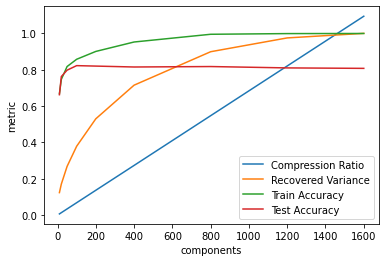

In [17]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################


plt.plot(component_num, compression_ratio, label = "Compression Ratio")
plt.plot(component_num, recovered_variance, label = "Recovered Variance")
plt.plot(component_num, train_accuracy, label = "Train Accuracy")
plt.plot(component_num, test_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel('components')
plt.ylabel('metric')
plt.show()

# Q5: Global Vectors for Word Representations (GloVe) [5pts]

## 5.1: GloVe [5pts]

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. The Global Vectors for Word Representation, or GloVe, algorithm is an extension to the word2vec method for efficiently learning word vectors, developed by Pennington, et al. at Stanford. GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. 

We will be using the provided **glove.6B.50d.txt** file for loading the pre-trained embeddings for the vocabulary. You will be transforming the Web of Science data to glove embeddings by taking the mean of the glove embeddings of all words in a sentence.

In the **glove.py** file complete the following function:
  * <strong>transform</strong>
  
Here is an example of taking the mean of the glove embeddings.

For the sentence : 'I love NLP Homework',

**Step-1** : We find the embeddings to each word using the provided glove model. Here using **glove.6B.50d.txt**, we get the embeddings of each word : I, love, NLP, Homework separately. All of them are a vector of shape (50,).

**Step-2** : We stack these embeddings and transform it to a numpy array. After this step, we get a shape of : (4,50) because there are 4 words (tokens) in the sentence.

**Step-3** : Next, we will be taking a mean of this array along the 0th dimension. We get the shape as : (1,50). This is the final glove embeddings for our sentence which can be used for further classification tasks.

Let us take a look at the glove embeddings for few words and their visualization in a 2D space.

In [19]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################


from glove import Glove

#Loads the glove model
gv = Glove()
gloveModel = gv.load_glove_model()
print('Similar words for Tree : {}'.format(gv.find_similar_word(gloveModel, gloveModel['tree'])[0:10]))
print('Similar words for King + Queen + Prince : {}'.format(
    gv.find_similar_word(gloveModel, gloveModel['king'] + gloveModel['queen'] + gloveModel['prince'])[0:10]))

Loading Glove Model
400000 words loaded!
Similar words for Tree : ['tree', 'trees', 'pine', 'flower', 'green', 'leaf', 'oak', 'chestnut', 'cedar', 'bark']
Similar words for King + Queen + Prince : ['king', 'prince', 'queen', 'throne', 'princess', 'son', 'emperor', 'royal', 'daughter', 'father']


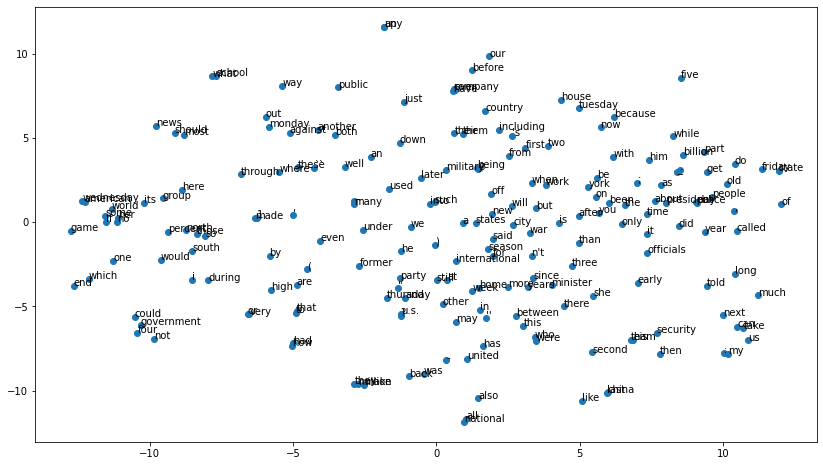

In [20]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

distri = TSNE(n_components=2)
words = list(gloveModel.keys())
vectors = [gloveModel[word] for word in words]
y = distri.fit_transform(np.array(vectors[100:300]))
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
    plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

### 5.1.1 Local Tests for GloVe Functions [No Points]
You may test your implementation of the functions contained in **glove.py** in the cell below. Feel free to comment out tests for functions that have not been completed yet. See [Using the Local Tests](#using_local_tests) for more details.

In [21]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from glove import Glove
from local_tests.glove_test import Glove_Test

test_gv = Glove_Test()

print('Local Tests for Glove Functions \n')
# Local test for transfrom
output = gv.transform(gloveModel, ['I love NLP Homework'])

embeddings = np.all(np.array(output) == test_gv.mean_embedding_test)
print('Your transform works as expected:', embeddings)

Local Tests for Glove Functions 

Number of samples with no words found: 0 / 1
Your transform works as expected: True


## 5.2: SVM Classification using GLoVe embeddings [No Points]

Run the below cell to classify the Clickbait train and test dataset using SVM functions with SVM that you have already implemented in 3.1 using glove embeddings that you have implemented in 5.1. 

In [22]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from svm import SVM

embeddings_train = gv.transform(gloveModel, list(df_train['headline']))
embeddings_test = gv.transform(gloveModel, list(df_test['headline']))

svm = SVM()
svm.fit(embeddings_train, y_train)
y_hat = svm.predict(embeddings_train)
y_hat_test = svm.predict(embeddings_test)

clf_train_score = np.where(y_train == y_hat, 1, 0).sum()/len(y_train)
clf_test_score = np.where(y_test == y_hat_test, 1, 0).sum()/len(y_test)

model = 'SVM'
encoding = 'wos GloVE'
metric = 'Accuracy Score'

print('Train {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_train_score))
print('Test {} for {} - {}: {:.4f}'.format(metric, model, encoding, clf_test_score))

Number of samples with no words found: 6048 / 19200
Number of samples with no words found: 1480 / 4800
Train Accuracy Score for SVM - wos GloVE: 0.9599
Test Accuracy Score for SVM - wos GloVE: 0.9575
